# Python for Data Science Practice Session 2 : Mathematics and Statistics

## Simpson's Paradox

Simpson's Paradox is a phenomenon in Probability and Statistics in which a trend appears in several groups of data but disappears or reverses when the groups are combined. You can read more about it and find a couple of examples here: https://en.wikipedia.org/wiki/Simpson%27s_paradox

In this section, we are going to investigate a dataset which will turn out to be a great example of this paradox. This dataset shows the expenditures on 1000 people from different ethnic groups, age groups and genders. An allegation of discrimination was made and supported by a univariate analysis that examined the average annual expenditures on consumers by ethnicity. In specific, the analysis concluded that the average annual expenditures on Hispanic consumers was approximately one-third of the average annual expenditures on White non-Hispanic consumers. 

In this section, we are going to carry out our own analysis and investigate whether the data supports the allegation or not. 

In [1]:
# Import pandas and matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the dataset 'californiaDDSDataV2.csv' into a dataframe
df = pd.read_csv('californiaDDSDataV2.csv')

In [4]:
# View the dataframe
df

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic
...,...,...,...,...,...,...
995,99622,51+,86,Female,57055,White not Hispanic
996,99715,18 to 21,20,Male,7494,Hispanic
997,99718,13 to 17,17,Female,3673,Multi Race
998,99791,6 to 12,10,Male,3638,Hispanic


In [5]:
# Produce a summary for the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1000.0,54662.846,25643.673401,10210.0,31808.75,55384.5,76134.75,99898.0
Age,1000.0,22.800,18.462038,0.0,12.00,18.0,26.00,95.0
Expenditures,1000.0,18065.786,19542.830884,222.0,2898.75,7026.0,37712.75,75098.0


In [6]:
# Import the unique ethnic groups in the dataframe
df['Ethnicity'].unique()

array(['White not Hispanic', 'Hispanic', 'Black', 'Multi Race', 'Asian',
       'American Indian', 'Other', 'Native Hawaiian'], dtype=object)

- - - - -
Let us now check the average annual expenditures of each ethnic group to check whether the result supports the allegation made.

In [7]:
# Group the data by the mean of the expenditures of each ethnic group and arrange them ascendingly  
df[['Ethnicity', 'Expenditures']].groupby('Ethnicity').mean().sort_values('Expenditures')

,Expenditures
Ethnicity,
Other,3316.500000
Multi Race,4456.730769
Hispanic,11065.569149
Asian,18392.372093
Black,20884.593220
White not Hispanic,24697.548628
American Indian,36438.250000
Native Hawaiian,42782.333333


The 'White not Hispanic' group has an average expenditure of slightly more than double of that of the 'Hispanic' class, which is not too far off from what the analysis mentioned above stated. Furthermore, Other, Multi Race and Hispanic have much smaller averages than the rest of the ethnic groups. This result goes well with the allegation. 

Let us plot a box plot of the expenditures of the different ethnic groups to visualise the data and have a clearer view. 

You can find the documenation of plotting a box plot here: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html
- - - - -
To start off, create variables that contain the expenditures of each ethnic group separately. Name them `White_not_Hispanic`, `Hispanic`, `Black`, `Multi_Race`, `Asian`, `American_Indian`, `Native_Hawaiian` and `Other`.

In [8]:
# Create variables that contain the expenditures of each ethnic group separately
White_not_Hispanic = df.loc[df['Ethnicity'] == 'White not Hispanic']['Expenditures']
Hispanic = df.loc[df['Ethnicity'] == 'Hispanic']['Expenditures']
Black = df.loc[df['Ethnicity'] == 'Black']['Expenditures']
Multi_Race = df.loc[df['Ethnicity'] == 'Multi Race']['Expenditures']
Asian = df.loc[df['Ethnicity'] == 'Asian']['Expenditures']
American_Indian = df.loc[df['Ethnicity'] == 'American Indian']['Expenditures']
Native_Hawaiian = df.loc[df['Ethnicity'] == 'Native Hawaiian']['Expenditures']
Other = df.loc[df['Ethnicity'] == 'Other']['Expenditures']

In [9]:
# Create a list of the variables
data = [White_not_Hispanic, Hispanic, Black, Multi_Race, Asian, American_Indian, Native_Hawaiian, Other]

Now, plot the box plot of the annual expenditures of each ethnic groups. 

For better visualisation, I would like for the boxes to be represented horizontally on the graph, and for the mean of every box to be visible on the plot. Read the documentation and figure out the parameters that you need to adjust in order to achieve this this.

In [10]:
# Plot the boxplot
fig, ax = plt.subplots()
plot = ax.boxplot(data, vert=False, meanline=True, showmeans=True)
ax.set_yticklabels(['White not Hispanic', 'Hispanic', 'Black', 'Multi Race', 'Asian', 'American Indian', 'Native Hawaiian', 'Other'])
ax.set_xlabel('Expenditures')
ax.set_ylabel('Ethnicity')

Text(0, 0.5, 'Ethnicity')

Looking at the above boxplot, there are signs that might support the presence of discrimination towards some of the ethnic groups:
1) Other, Asian, Multi Race, Black and Hispanic have significantly smaller median values than White not Hispanic, Native Hawaiian and American Indian.

2) Other, Multi Race and Hispanic generally have significantly smaller mean, Q3 and maximum values (i.e. the edge of the right whisker of the box) than the rest of the ethnic groups.

3) Comparing Hispanic with White not Hispanic, there is a big difference between the size of the box of both ethnic groups. The Hispanic group's box has a much smaller median and mean, as well as a much smaller maximum value.

But, is this enough to conclude that the allegation is in fact true?

Should we use the above box plot as evidence, or is there more to it that we cannot observe solely from this analysis? 


One thing to notice is that we haven't considered all the grouping options that we have. We tried grouping the data by the mean of the expenditures of each ethnic group, but we didn't consider grouping the data by Gender, or Age groups. Let us try doing both:

In [10]:
# Group the data by the mean of the expenditures of each Gender group and arrange them ascendingly
df[['Gender', 'Expenditures']].groupby('Gender').mean().sort_values('Expenditures')

,Expenditures
Gender,
Male,18001.195171
Female,18129.606362


The mean expenditures for Males and Females are very close which isn't very interesting for our Analysis. Keep in mind though that this result came from using all the data, hence results might turn out to be very different when looking at specific ethnic groups. This is something for you to explore on your own to check and see if there is gender discrimination.

Let us now group the data by the average annual expenditures of each age group.

In [11]:
# Group the data by the mean of the expenditures of each Age group and arrange them ascendingly
df[['Age Cohort', 'Expenditures']].groupby('Age Cohort').mean().sort_values('Expenditures')

,Expenditures
Age Cohort,
0 to 5,1415.280488
6 to 12,2226.862857
13 to 17,3922.613208
18 to 21,9888.537688
22 to 50,40209.283186
51+,53521.896226


Now this is interesting. It is clear that as we increase the age group, the average of the annual expenditures increases. 

Also, there is a huge leap from the mean of expenditures of people of ages less than 21 to the mean of expenditures of people of ages more than 21. 

A thing to keep in mind is that the people in each ethnic group are not divided equally among the 6 age groups that are present, so some of the ethnic groups have more people in a specific age group than the other ethnic groups.

I would like for you to take a moment and think about the consequences of this before moving on to the next tasks, because this is where the paradox stems from.
- - - - -

In the next tasks, I would like for you to create box plots of the expenditures of the different ethnic groups, with respect to a specific age group.

So, in total, I would like for you to create six box plots corresponding to the six age groups that are present, following the same exact procedures that we followed in the previous box plot.

## Ages 0 to 5

In [12]:
# Create variables that contain the expenditures of each ethnic group separately
White_not_Hispanic_0to5 = df.loc[df['Age Cohort'] == '0 to 5'].loc[df['Ethnicity'] == 'White not Hispanic']['Expenditures']
Hispanic_0to5 = df.loc[df['Age Cohort'] == '0 to 5'].loc[df['Ethnicity'] == 'Hispanic']['Expenditures']
Black_0to5 = df.loc[df['Age Cohort'] == '0 to 5'].loc[df['Ethnicity'] == 'Black']['Expenditures']
Multi_Race_0to5 = df.loc[df['Age Cohort'] == '0 to 5'].loc[df['Ethnicity'] == 'Multi Race']['Expenditures']
Asian_0to5 = df.loc[df['Age Cohort'] == '0 to 5'].loc[df['Ethnicity'] == 'Asian']['Expenditures']
American_Indian_0to5 = df.loc[df['Age Cohort'] == '0 to 5'].loc[df['Ethnicity'] == 'American Indian']['Expenditures']
Native_Hawaiian_0to5 = df.loc[df['Age Cohort'] == '0 to 5'].loc[df['Ethnicity'] == 'Native Hawaiian']['Expenditures']
Other_0to5 = df.loc[df['Age Cohort'] == '0 to 5'].loc[df['Ethnicity'] == 'Other']['Expenditures']

In [13]:
# Create a list of the variables
data_0to5 = [White_not_Hispanic_0to5, Hispanic_0to5, Black_0to5, Multi_Race_0to5, Asian_0to5, American_Indian_0to5, Native_Hawaiian_0to5, Other_0to5 ]

Text(0.5, 1.0, 'Ages 0 to 5')

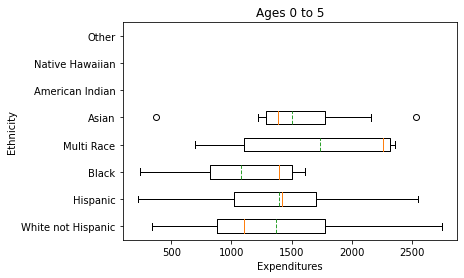

In [14]:
# Plot the boxplot
fig, ax = plt.subplots()
plot = ax.boxplot(data_0to5, vert=False, meanline=True, showmeans=True)
ax.set_yticklabels(['White not Hispanic', 'Hispanic', 'Black', 'Multi Race', 'Asian', 'American Indian', 'Native Hawaiian', 'Other'])
ax.set_ylabel('Ethnicity')
ax.set_xlabel('Expenditures')
ax.set_title('Ages 0 to 5')

## Ages 6 to 12

In [15]:
# Create variables that contain the expenditures of each ethnic group separately
White_not_Hispanic_6to12 = df.loc[df['Age Cohort'] == '6 to 12'].loc[df['Ethnicity'] == 'White not Hispanic']['Expenditures']
Hispanic_6to12 = df.loc[df['Age Cohort'] == '6 to 12'].loc[df['Ethnicity'] == 'Hispanic']['Expenditures']
Black_6to12 = df.loc[df['Age Cohort'] == '6 to 12'].loc[df['Ethnicity'] == 'Black']['Expenditures']
Multi_Race_6to12 = df.loc[df['Age Cohort'] == '6 to 12'].loc[df['Ethnicity'] == 'Multi Race']['Expenditures']
Asian_6to12 = df.loc[df['Age Cohort'] == '6 to 12'].loc[df['Ethnicity'] == 'Asian']['Expenditures']
American_Indian_6to12 = df.loc[df['Age Cohort'] == '6 to 12'].loc[df['Ethnicity'] == 'American Indian']['Expenditures']
Native_Hawaiian_6to12 = df.loc[df['Age Cohort'] == '6 to 12'].loc[df['Ethnicity'] == 'Native Hawaiian']['Expenditures']
Other_6to12 = df.loc[df['Age Cohort'] == '6 to 12'].loc[df['Ethnicity'] == 'Other']['Expenditures']

In [16]:
# Create a list of the variables
data_6to12 = [White_not_Hispanic_6to12, Hispanic_6to12, Black_6to12, Multi_Race_6to12, Asian_6to12, American_Indian_6to12, Native_Hawaiian_6to12, Other_6to12]

Text(0.5, 1.0, 'Ages 6 to 12')

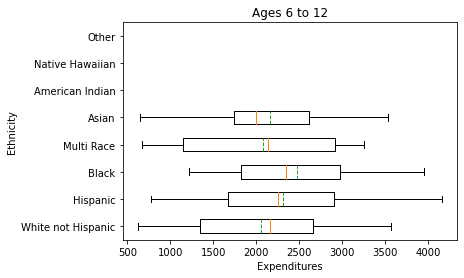

In [17]:
# Plot the boxplot
fig, ax = plt.subplots()
plot = ax.boxplot(data_6to12, vert=False, meanline=True, showmeans=True)
ax.set_yticklabels(['White not Hispanic', 'Hispanic', 'Black', 'Multi Race', 'Asian', 'American Indian', 'Native Hawaiian', 'Other'])
ax.set_ylabel('Ethnicity')
ax.set_xlabel('Expenditures')
ax.set_title('Ages 6 to 12')

## Ages 13 to 17

In [18]:
# Create variables that contain the expenditures of each ethnic group separately
White_not_Hispanic_13to17 = df.loc[df['Age Cohort'] == '13 to 17'].loc[df['Ethnicity'] == 'White not Hispanic']['Expenditures']
Hispanic_13to17 = df.loc[df['Age Cohort'] == '13 to 17'].loc[df['Ethnicity'] == 'Hispanic']['Expenditures']
Black_13to17 = df.loc[df['Age Cohort'] == '13 to 17'].loc[df['Ethnicity'] == 'Black']['Expenditures']
Multi_Race_13to17 = df.loc[df['Age Cohort'] == '13 to 17'].loc[df['Ethnicity'] == 'Multi Race']['Expenditures']
Asian_13to17 = df.loc[df['Age Cohort'] == '13 to 17'].loc[df['Ethnicity'] == 'Asian']['Expenditures']
American_Indian_13to17 = df.loc[df['Age Cohort'] == '13 to 17'].loc[df['Ethnicity'] == 'American Indian']['Expenditures']
Native_Hawaiian_13to17 = df.loc[df['Age Cohort'] == '13 to 17'].loc[df['Ethnicity'] == 'Native Hawaiian']['Expenditures']
Other_13to17 = df.loc[df['Age Cohort'] == '13 to 17'].loc[df['Ethnicity'] == 'Other']['Expenditures']

In [19]:
# Create a list of the variables
data_13to17 = [White_not_Hispanic_13to17, Hispanic_13to17, Black_13to17, Multi_Race_13to17, Asian_13to17, American_Indian_13to17, Native_Hawaiian_13to17, Other_13to17]

Text(0.5, 1.0, 'Ages 13 to 17')

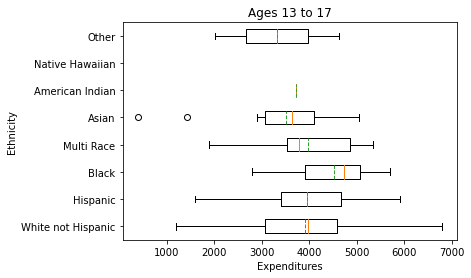

In [20]:
# Plot the boxplot
fig, ax = plt.subplots()
plot = ax.boxplot(data_13to17, vert=False, meanline=True, showmeans=True)
ax.set_yticklabels(['White not Hispanic', 'Hispanic', 'Black', 'Multi Race', 'Asian', 'American Indian', 'Native Hawaiian', 'Other'])
ax.set_ylabel('Ethnicity')
ax.set_xlabel('Expenditures')
ax.set_title('Ages 13 to 17')

## Ages 18 to 21

In [21]:
# Create variables that contain the expenditures of each ethnic group separately
White_not_Hispanic_18to21 = df.loc[df['Age Cohort'] == '18 to 21'].loc[df['Ethnicity'] == 'White not Hispanic']['Expenditures']
Hispanic_18to21 = df.loc[df['Age Cohort'] == '18 to 21'].loc[df['Ethnicity'] == 'Hispanic']['Expenditures']
Black_18to21 = df.loc[df['Age Cohort'] == '18 to 21'].loc[df['Ethnicity'] == 'Black']['Expenditures']
Multi_Race_18to21 = df.loc[df['Age Cohort'] == '18 to 21'].loc[df['Ethnicity'] == 'Multi Race']['Expenditures']
Asian_18to21 = df.loc[df['Age Cohort'] == '18 to 21'].loc[df['Ethnicity'] == 'Asian']['Expenditures']
American_Indian_18to21 = df.loc[df['Age Cohort'] == '18 to 21'].loc[df['Ethnicity'] == 'American Indian']['Expenditures']
Native_Hawaiian_18to21 = df.loc[df['Age Cohort'] == '18 to 21'].loc[df['Ethnicity'] == 'Native Hawaiian']['Expenditures']
Other_18to21 = df.loc[df['Age Cohort'] == '18 to 21'].loc[df['Ethnicity'] == 'Other']['Expenditures']

In [22]:
# Create a list of the variables
data_18to21 = [White_not_Hispanic_18to21, Hispanic_18to21, Black_18to21, Multi_Race_18to21, Asian_18to21, American_Indian_18to21, Native_Hawaiian_18to21, Other_18to21]

Text(0.5, 1.0, 'Ages 18 to 21')

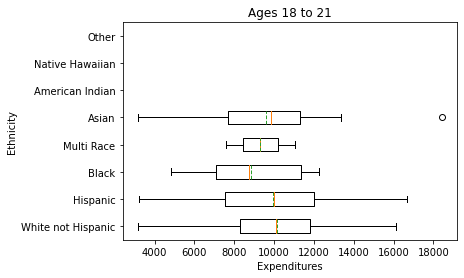

In [23]:
# Plot the boxplot
fig, ax = plt.subplots()
plot = ax.boxplot(data_18to21, vert=False, meanline=True, showmeans=True)
ax.set_yticklabels(['White not Hispanic', 'Hispanic', 'Black', 'Multi Race', 'Asian', 'American Indian', 'Native Hawaiian', 'Other'])
ax.set_ylabel('Ethnicity')
ax.set_xlabel('Expenditures')
ax.set_title('Ages 18 to 21')

## Ages 22 to 50

In [24]:
# Create variables that contain the expenditures of each ethnic group separately
White_not_Hispanic_22to50 = df.loc[df['Age Cohort'] == '22 to 50'].loc[df['Ethnicity'] == 'White not Hispanic']['Expenditures']
Hispanic_22to50 = df.loc[df['Age Cohort'] == '22 to 50'].loc[df['Ethnicity'] == 'Hispanic']['Expenditures']
Black_22to50 = df.loc[df['Age Cohort'] == '22 to 50'].loc[df['Ethnicity'] == 'Black']['Expenditures']
Multi_Race_22to50 = df.loc[df['Age Cohort'] == '22 to 50'].loc[df['Ethnicity'] == 'Multi Race']['Expenditures']
Asian_22to50 = df.loc[df['Age Cohort'] == '22 to 50'].loc[df['Ethnicity'] == 'Asian']['Expenditures']
American_Indian_22to50 = df.loc[df['Age Cohort'] == '22 to 50'].loc[df['Ethnicity'] == 'American Indian']['Expenditures']
Native_Hawaiian_22to50 = df.loc[df['Age Cohort'] == '22 to 50'].loc[df['Ethnicity'] == 'Native Hawaiian']['Expenditures']
Other_22to50 = df.loc[df['Age Cohort'] == '22 to 50'].loc[df['Ethnicity'] == 'Other']['Expenditures']

In [25]:
# Create a list of the variables
data_22to50 = [White_not_Hispanic_22to50, Hispanic_22to50, Black_22to50, Multi_Race_22to50, Asian_22to50, American_Indian_22to50, Native_Hawaiian_22to50, Other_22to50]

Text(0.5, 1.0, 'Ages 22 to 50')

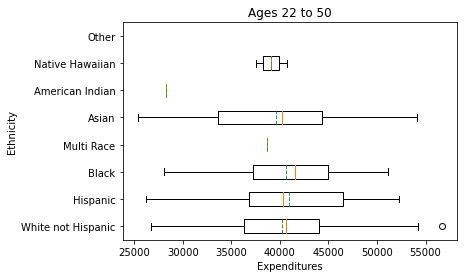

In [26]:
# Plot the boxplot
fig, ax = plt.subplots()
plot = ax.boxplot(data_22to50, vert=False, meanline=True, showmeans=True)
ax.set_yticklabels(['White not Hispanic', 'Hispanic', 'Black', 'Multi Race', 'Asian', 'American Indian', 'Native Hawaiian', 'Other'])
ax.set_ylabel('Ethnicity')
ax.set_xlabel('Expenditures')
ax.set_title('Ages 22 to 50')

## Ages 51+

In [27]:
# Create variables that contain the expenditures of each ethnic group separately
White_not_Hispanic_51plus = df.loc[df['Age Cohort'] == '51+'].loc[df['Ethnicity'] == 'White not Hispanic']['Expenditures']
Hispanic_51plus = df.loc[df['Age Cohort'] == '51+'].loc[df['Ethnicity'] == 'Hispanic']['Expenditures']
Black_51plus = df.loc[df['Age Cohort'] == '51+'].loc[df['Ethnicity'] == 'Black']['Expenditures']
Multi_Race_51plus = df.loc[df['Age Cohort'] == '51+'].loc[df['Ethnicity'] == 'Multi Race']['Expenditures']
Asian_51plus = df.loc[df['Age Cohort'] == '51+'].loc[df['Ethnicity'] == 'Asian']['Expenditures']
American_Indian_51plus = df.loc[df['Age Cohort'] == '51+'].loc[df['Ethnicity'] == 'American Indian']['Expenditures']
Native_Hawaiian_51plus = df.loc[df['Age Cohort'] == '51+'].loc[df['Ethnicity'] == 'Native Hawaiian']['Expenditures']
Other_51plus = df.loc[df['Age Cohort'] == '51+'].loc[df['Ethnicity'] == 'Other']['Expenditures']

In [28]:
# Create a list of the variables
data_51plus = [White_not_Hispanic_51plus, Hispanic_51plus, Black_51plus, Multi_Race_51plus, Asian_51plus, American_Indian_51plus, Native_Hawaiian_51plus, Other_51plus]

Text(0.5, 1.0, 'Ages 51+')

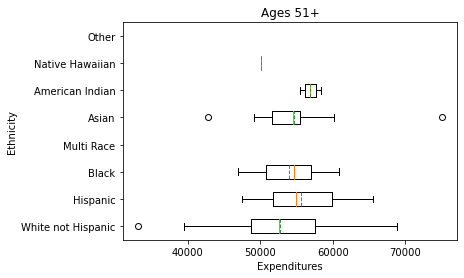

In [29]:
# Plot the boxplot 
fig, ax = plt.subplots()
plot = ax.boxplot(data_51plus, vert=False, meanline=True, showmeans=True)
ax.set_yticklabels(['White not Hispanic', 'Hispanic', 'Black', 'Multi Race', 'Asian', 'American Indian', 'Native Hawaiian', 'Other'])
ax.set_ylabel('Ethnicity')
ax.set_xlabel('Expenditures')
ax.set_title('Ages 51+')

Now, I want you to plot the six box plots together as well as the first box plot that included the data of all of the age groups together so that we can compare them easily. Adjust the figure sizes of the box plots in order for all of the plots to fit on your screen for ease of visualisation.

Text(0.5, 0, 'Expenditures')

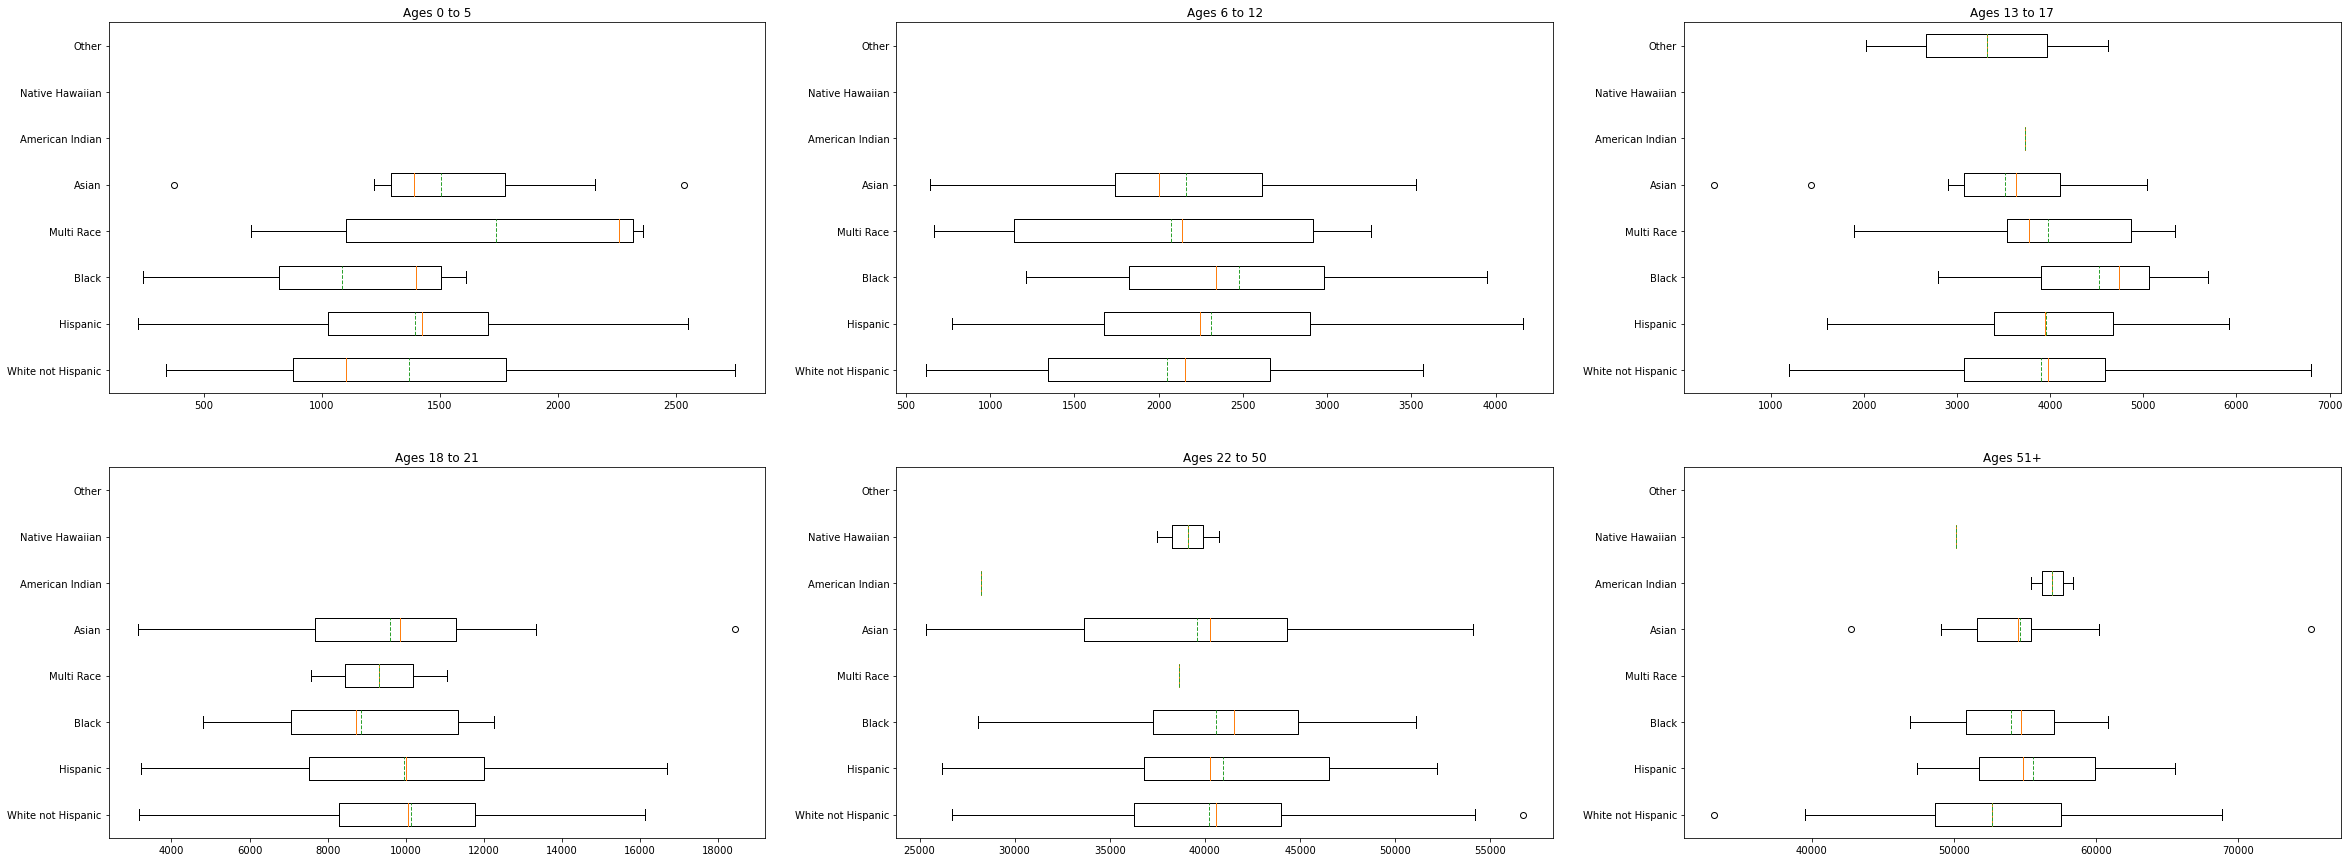

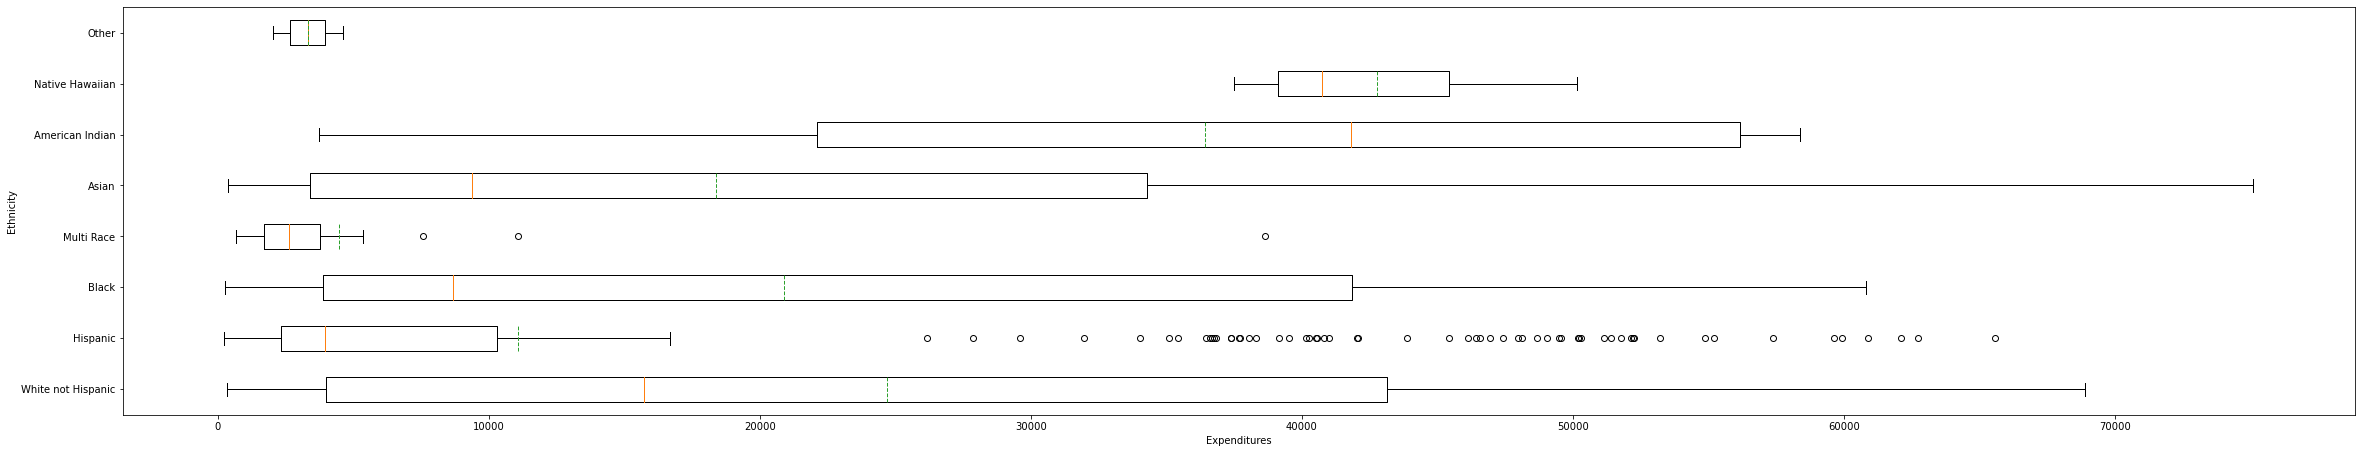

In [30]:
# Plot the six box plots together with the first boxplot
fig, axs = plt.subplots(2,3, figsize=(40,15))
axs[0,0].boxplot(data_0to5, vert=False, meanline=True, showmeans=True)
axs[0,1].boxplot(data_6to12, vert=False, meanline=True, showmeans=True)
axs[0,2].boxplot(data_13to17, vert=False, meanline=True, showmeans=True)
axs[1,0].boxplot(data_18to21, vert=False, meanline=True, showmeans=True)
axs[1,1].boxplot(data_22to50, vert=False, meanline=True, showmeans=True)
axs[1,2].boxplot(data_51plus, vert=False, meanline=True, showmeans=True)
axs[0,0].set_title('Ages 0 to 5')
axs[0,1].set_title('Ages 6 to 12')
axs[0,2].set_title('Ages 13 to 17')
axs[1,0].set_title('Ages 18 to 21')
axs[1,1].set_title('Ages 22 to 50')
axs[1,2].set_title('Ages 51+')
axs[0,0].set_yticklabels(['White not Hispanic', 'Hispanic', 'Black', 'Multi Race', 'Asian', 'American Indian', 'Native Hawaiian', 'Other'])
axs[0,1].set_yticklabels(['White not Hispanic', 'Hispanic', 'Black', 'Multi Race', 'Asian', 'American Indian', 'Native Hawaiian', 'Other'])
axs[0,2].set_yticklabels(['White not Hispanic', 'Hispanic', 'Black', 'Multi Race', 'Asian', 'American Indian', 'Native Hawaiian', 'Other'])
axs[1,0].set_yticklabels(['White not Hispanic', 'Hispanic', 'Black', 'Multi Race', 'Asian', 'American Indian', 'Native Hawaiian', 'Other'])
axs[1,1].set_yticklabels(['White not Hispanic', 'Hispanic', 'Black', 'Multi Race', 'Asian', 'American Indian', 'Native Hawaiian', 'Other'])
axs[1,2].set_yticklabels(['White not Hispanic', 'Hispanic', 'Black', 'Multi Race', 'Asian', 'American Indian', 'Native Hawaiian', 'Other'])
fig, ax = plt.subplots(figsize=(40,7.5))
plot = ax.boxplot(data, vert=False, meanline=True, showmeans=True)
ax.set_yticklabels(['White not Hispanic', 'Hispanic', 'Black', 'Multi Race', 'Asian', 'American Indian', 'Native Hawaiian', 'Other'])
ax.set_ylabel('Ethnicity')
ax.set_xlabel('Expenditures')

Now, take a close look into all of the plots. For each age group, there doesn't seem to be any obvious discrimination towards any of the ethnic groups as we saw in the first boxplot that included all of the age groups at the same time. 

Also, regarding the analysis that concluded that the average annual expenditures on Hispanic consumers was approximately one-third of the average expenditures on White not Hispanic consumers, It turns out that this is not the case when considering the data of each age group separately. In fact, the average annual expenditures of the Hispanic group is larger than the average annual expenditures of the White non Hispanic group in 5 out of 6 of the age groups, which is the complete opposite of what the analysis stated.

But, why is this the case? I will leave this for you to discover. 

<b>HINT</b>: Remember when I asked you to take a moment and think about the consequences before? Count the number of Hispanic and White non Hispanic people for each age group, and alongside that, keep in mind the annual expenditures for each of the Hispanic and White non Hispanic groups.
- - - -

This was an example of Simpson's Paradox. A thing to learn here is to make sure that you've considered every aspect of the data that you have before making a strong allegation like the one that was made here. 
- - - - 

# The Mandelbrot Set

The Mandelbrot Set is the set of complex numbers $c$ for which the function $f_{c}(z) = z^2 + c$ does not diverge when iterated from $z = 0$. When drawn on a complex plane, it shows some very interesting features like the appearance of the Fibonacci sequence in its structure and being able to approximate $\pi$ in an unexpected way. 

Have a look at these videos if you'd like to know more: 
- https://www.youtube.com/watch?v=4LQvjSf6SSw
- https://www.youtube.com/watch?v=d0vY0CKYhPY&t=412s
- https://www.youtube.com/watch?v=FFftmWSzgmk&t=351s

It is famously known for its appealing structure when graphed, which is what we are going to do in the upcoming tasks.

The Mandelbrot set image can be drawn in Python by sampling the complex numbers $c$ and testing for each sample point $c$ whether the sequence $f_{c}(0)$, $f_{c}(f_{c}(0)), \dotsc$  diverges. Then, the real and imaginary parts of the sampled complex numbers $c$ are treated as the co-ordinates of the image (i.e. the location of the pixel on the grid of the image), where the pixels are coloured according to the number of iterations needed by the function $f_{c}$ for its magnitude to pass a specific threshold (we are going to set the threshhold at $2$) 

Let's go through the process step by step. Firstly, let's import the packages needed: `matplotlib.pyplot` and `numpy`.

<b>NOTE:</b> We are going to explore `numpy` properly in the upcoming session, but for now, we are going to need some of its functions for the plotting of the image.

In [31]:
# Import matplotlib.pyplot and numpy (as np)
import matplotlib.pyplot as plt
import numpy as np

Now, create a function called `mandelbrot` that returns the number of iterations needed for the function $f_{c}$ for some complex number $c$ to pass the threshold value of $2$, starting from $z=0$. It should include the parameters `Re` for the real part of $c$, `Im` for the imaginary part of $c$, and `max_iter` for the maximum number of iterations that the function can go through before terminating and returning `max_iter` as the result.

In [32]:
# Define the function mandelbrot
def mandelbrot(Re, Im, max_iter):
    c = complex(Re,Im)
    z = 0 
    for i in range(max_iter):
        z = z*z + c
        if abs(z) >= 2:
            return i
        
    return max_iter

In the next steps, we are going to go through the process of creating the image.

To start off, create two variables, `rows` and `columns`, which contain the number of pixels we would like to have per each row/column of pixels in the image. We would like to have a 2000x2000 image.

In [33]:
# Create the variables rows and columns
rows = 2000
columns = 2000

Now, use `numpy.zeros` in order to create a 2000x2000 array of zeros. You can find its documentation here: https://numpy.org/doc/stable/reference/generated/numpy.zeros.html

In [34]:
# Create a 2000x2000 array of zeros, name it result
result = np.zeros((rows,columns))

For this image, we are going to consider the ranges $[-2,1]$ for the real part of $c$ and $[-1,1]$ for the imaginary part. What we would like to do now is to create a 1D array of 2000 evenly spaced numbers between $[-2,1]$ and $[-1,1]$ which represent the values of the real and imaginary parts of the co-ordinates of the image (i.e. the sampled values of $c$)

We do this by using the function `numpy.linspace`. You can find its documentation here: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

Call the first array `Re_vals` and the second array `Im_vals`.

In [35]:
# Create Re_vals and Im_vals
Re_vals = np.linspace(-2, 1, num=rows)
Im_vals = np.linspace(-1, 1, num=columns)

Now, I would like for you to:
1) Loop over both the indexes and the values of `Re_vals` and `Im_vals` in order to replace each entry in the 2000x2000 array called `result` with the number of iterations that is associated with each co-ordinate (i.e. each $c$ value).

2) Transpose the result array (I will leave it for you to think about why we do this).

In [36]:
# Fill in the result array 
for row_index, Re in enumerate(Re_vals):
    for column_index, Im in enumerate(Im_vals):
        result[row_index, column_index] = mandelbrot(Re, Im, 200)
result = result.T

For the final step, create a plot for the image which has the `dpi` set to $150$, and then use `ax.imshow()` in order to create the image. You can find its documentation here: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html

I would like for you to set the following parameters in `ax.imshow()` as follows: 
1) `cmap`='hot'

2)`interpolation`='bilinear'

3) `extent`=$[-2,1,-1,1]$ 



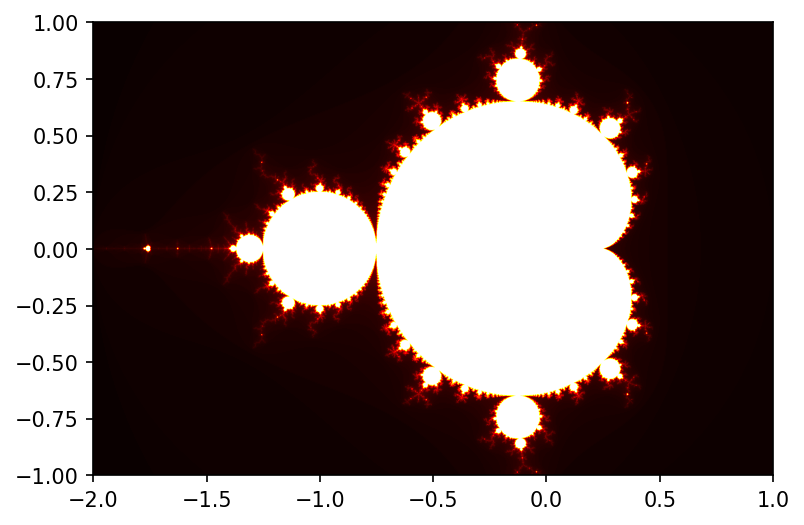

In [37]:
# Plot the image
fig, ax = plt.subplots(dpi=150)
ax.imshow(result, cmap='hot', interpolation='bilinear', extent=[-2,1,-1,1])

There you go!

You can go the extra mile and produce an animation of this fractal as well. You can find a guide of how to do this here: https://matplotlib.org/matplotblog/posts/animated-fractals/ 

## Rejection Sampling

Rejection Sampling is a technique that is used to generate observations from distributions. The basic intuition behind it is to uniformly sample points on a 2D square/rectangle that contains the probability density function inside, choose the points that lie underneath the probability density function, and then their x co-ordinates are the simulated samples from this distribution.

You can read more about it here: https://en.wikipedia.org/wiki/Rejection_sampling#:~:text=Rejection%20sampling%20is%20based%20on,graph%20of%20its%20density%20function.

We are going to test out this technique on the Standard Normal Distribution and simulate points manually.

Firstly, import the libraries `math`, `random` and `numpy`

In [38]:
# Import math, random and numpy
import random
import math
import numpy as np

Here are the main steps of the process:
1) Generate random uniform points on a rectangle that ranges from $[-3,3]$ on the x-axis and from $[0,0.6]$ on the y-axis.

2) Plot the probability density function of the Standard Normal Distribution.

3) Identify the points that are underneath the density function of the Standard Normal Distribution.

4) Extract the x co-ordinates of those points.
 - - - 

To start off, create 4 empty sets: 
1) `xs` - this will contain the x co-ordinates of the uniformly sampled points

2) `ys` - this will contain the y co-ordinates of the uniformly sampled points

3) `xs_samples` - this will contain the x co-ordinates of the uniformly sampled points that fall underneath the density function

4) `ys_samples` - this will contain the y co-ordinates of the uniformly sampled points that fall underneath the density function

In [39]:
# Create the 4 variables mentioned 
xs = []
ys = []
xs_samples = []
ys_samples = []

Now, let N be the number of points that we will uniformly sample. Set N to 2000.

In [40]:
# Create N
N = 2000

For the following task, I would like for you to:
1) Fill in the variables `xs` and `ys` with N uniformly sampled points from $[-3,3]$ and $[0,0.6]$.

2) For each point, check if it lies underneath the density function of the Standard Normal Distribution. If it does, add the x and y co-ordinates of this point to `xs_samples` and `ys_samples`. 

In [41]:
for i in range(N):
        xs.append(random.uniform(-3,3))
        ys.append(random.uniform(0,0.6))
        if ys[i] <= math.exp(-xs[i]*xs[i]/2) / math.sqrt(2*math.pi):
            xs_samples.append(xs[i])
            ys_samples.append(ys[i])

Plot a figure which contains all of the uniformly sampled points and a graph of the density function, where the points above the density function are coloured in `blue`, the points below the density function are coloured in `green`, and the density function coloured in `red`.

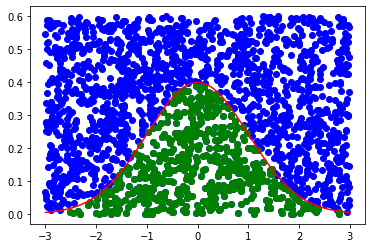

In [42]:
# Plot the figure as instructed
fig, ax = plt.subplots()
xs2= np.linspace(-3,3,2000)
ys2= [math.exp(-x*x/2) / math.sqrt(2*math.pi) for x in xs2] 
ax.plot(xs2,ys2, c='red')
ax.scatter(xs,ys, c='blue')
ax.scatter(xs_samples,ys_samples,c='green')

Now, according to Rejection Sampling, the simulated points in `xs_samples` should follow a Standard Normal Distribution. To check if this is true, we are going to plot a `qqplot` using the library called `statsmodels.api`. You will need to download it on your environment before importing it into Python. 

Use the following command: `pip install statsmodels` to install it.

In [43]:
# Import statsmodels.api
import statsmodels.api as sm

The `qqplot` function requires the data to be presented in an array instead of a list, so the next line of code does so:

In [44]:
# This converts xs_samples from a list to a numpy array
xs_samples = np.array(xs_samples)

Using the documentation here: https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html
Plot a qqplot of `xs_samples`. 

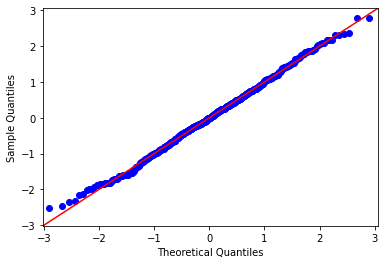

In [45]:
# Plot the qqplot of xs_samples
sm.qqplot(xs_samples, line='45')
plt.show()

This is very strong evidence that the values simulated in `xs_samples` do in fact follow a Standard Normal Distribution, which supports the validity of Rejection Sampling.

Bonus: 
1) Play around with the value N, and check the results.

2) Try out this technique on other distributions too.